Saving creditcard.csv to creditcard (1).csv
Dataset shape: (284807, 31)
Fraudulent transactions: Class
0    284315
1       492
Name: count, dtype: int64


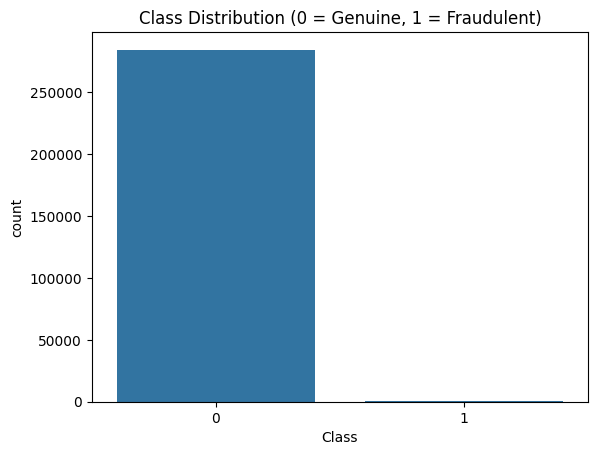

After Oversampling: [227451 227451]

--- Logistic Regression Evaluation ---
Confusion Matrix:
 [[55406  1458]
 [    8    90]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Precision: 0.05813953488372093
Recall: 0.9183673469387755
F1 Score: 0.10935601458080195

--- Random Forest Evaluation ---
Confusion Matrix:
 [[56846    18]
 [   19    79]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.81      0.81        98

    accuracy                           1.00     56962
   macro avg       0.91      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962



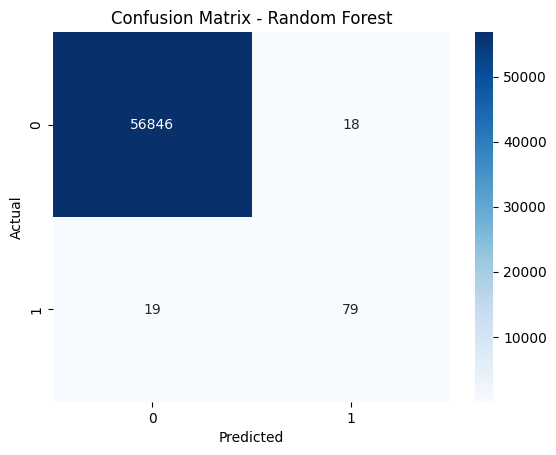

In [2]:
from google.colab import files
uploaded=files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

df = pd.read_csv('creditcard.csv')
df.head()

print("Dataset shape:", df.shape)
print("Fraudulent transactions:", df['Class'].value_counts())

sns.countplot(data=df, x='Class')
plt.title("Class Distribution (0 = Genuine, 1 = Fraudulent)")
plt.show()

scaler = StandardScaler()
df['Normalized_Amount'] = scaler.fit_transform(df[['Amount']])
df['Normalized_Time'] = scaler.fit_transform(df[['Time']])

df.drop(['Amount', 'Time'], axis=1, inplace=True)

df.head()

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After Oversampling:", np.bincount(y_train_res))

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_res, y_train_res)
log_preds = log_model.predict(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res, y_train_res)
rf_preds = rf_model.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} Evaluation ---")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))

evaluate_model(y_test, log_preds, "Logistic Regression")
evaluate_model(y_test, rf_preds, "Random Forest")

sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


